# Flight Price Predictor

## Importing the Libraries

Run the following code to import the necessary libraries for data manipulation, visualization, and machine learning.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import math

## Loading the Dataset

In [34]:
df = pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [35]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

## Data Visualization

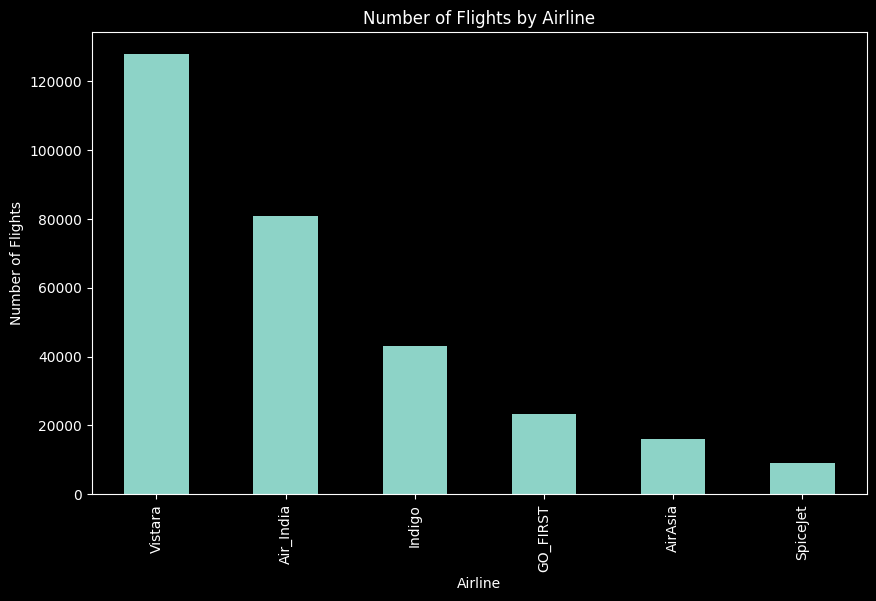

In [36]:
plt.figure(figsize=(10,6))
df['airline'].value_counts().plot(kind='bar')
plt.title('Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.show()

## Data Preprocessing

In [37]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [38]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [39]:
df.drop(df.index[29359], inplace=True)
df.drop(['Unnamed: 0', 'flight'], axis=1, inplace=True)

In [40]:
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [41]:
df = df.join(pd.get_dummies(df['airline'], prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df['source_city'], prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df['destination_city'], prefix='destination')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df['departure_time'], prefix='departure')).drop('departure_time', axis=1)
df = df.join(pd.get_dummies(df['arrival_time'], prefix='arrival_time')).drop('arrival_time', axis=1)

In [42]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,zero,Economy,2.17,1,5953,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,zero,Economy,2.33,1,5953,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,zero,Economy,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,zero,Economy,2.25,1,5955,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,zero,Economy,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,one,Business,10.08,49,69265,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
300149,one,Business,10.42,49,77105,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300150,one,Business,13.83,49,79099,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300151,one,Business,10.00,49,81585,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [43]:
df['class'].value_counts()

class
Economy     206665
Business     93487
Name: count, dtype: int64

In [45]:
df['class'] = df['class'].apply(lambda x: 1 if x=='Business' else 0)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,zero,0,2.17,1,5953,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,zero,0,2.33,1,5953,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,zero,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,zero,0,2.25,1,5955,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,zero,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,one,1,10.08,49,69265,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
300149,one,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300150,one,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300151,one,1,10.00,49,81585,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [46]:
df['stops'] = pd.factorize(df['stops'])[0]

In [47]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300151,1,1,10.00,49,81585,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [48]:
df = df.astype(int)

In [49]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_Evening,departure_Late_Night,departure_Morning,departure_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2,1,5953,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,2,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2,1,5955,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,2,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10,49,69265,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
300149,1,1,10,49,77105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300150,1,1,13,49,79099,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300151,1,1,10,49,81585,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300152 entries, 0 to 300152
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   stops                       300152 non-null  int64
 1   class                       300152 non-null  int64
 2   duration                    300152 non-null  int64
 3   days_left                   300152 non-null  int64
 4   price                       300152 non-null  int64
 5   airline_AirAsia             300152 non-null  int64
 6   airline_Air_India           300152 non-null  int64
 7   airline_GO_FIRST            300152 non-null  int64
 8   airline_Indigo              300152 non-null  int64
 9   airline_SpiceJet            300152 non-null  int64
 10  airline_Vistara             300152 non-null  int64
 11  source_Bangalore            300152 non-null  int64
 12  source_Chennai              300152 non-null  int64
 13  source_Delhi                300152 non-null  int6

## Splitting the dataset into Training and Testing sets

In [51]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

## Training the Model

In [54]:
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

## Evaluating the Model

In [58]:
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_preds)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 1484.857746974741
Mean Squared Error: 12531940.116696652
Root Mean Squared Error: 3540.0480387554985
R^2 Score: 0.9755879910350131


## Making New Predictions

In [59]:
prediction = model.predict(X_test)
print(f'Predicted Price: {prediction[0]}')

Predicted Price: 7324.16


## Visualizing Errors

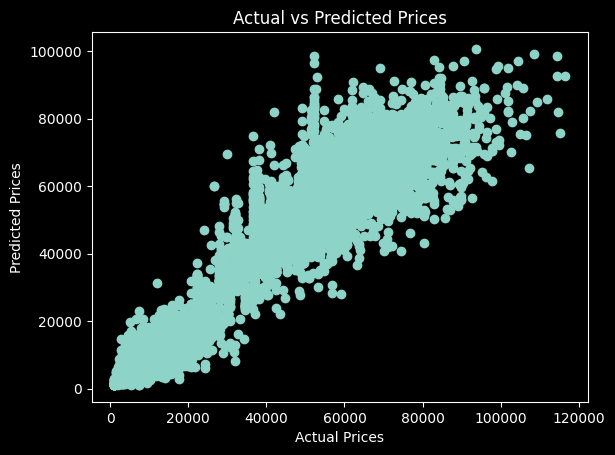

In [61]:
plt.scatter(y_test, y_preds)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()